# Ensemble Methods :  Problem 1
## Bagging with SCIKIT

## Disclaimer
These exercises are based on the work by T. Hastie et al. pertaining to the article 'Elements of Statistical Learning', Springer 2009. The environment of the exercise have been tuned to the theory content taught at Ravensburg Weingarten University. [Hastie et al.](https://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html#sphx-glr-auto-examples-ensemble-plot-bias-variance-py)

We are using the Python programming language. If you don't know Python or if you would like to refresh your memory, take a look at the [Python tutorial](http://docs.python.org/tut/).
We will mostly work with NumPy, the fundamental package for scientific computing in Python. Please read the [NumPy quickstart tutorial](https://numpy.org/devdocs/user/quickstart.html). In addition, the documention of MatPlotLib and Scipy lib can be found here: .[MatplotLib](https://matplotlib.org/). [Scipy](https://docs.scipy.org/doc/scipy/reference/tutorial/).

## Introduction

Referring to the lecture slides, we learnt that Ensemble Methods are usefull in cases the individual model cannot perform well. Ensemble methods make a combination of models such that the ensemble has a better performance than the individual ones. An ensemble is created by averaging (in case of regression) or voting (in case of
classification). Refer the below image for recalling how the Bagging Method work.

<img src='./graphic/2.png' width='550' height='550'>

In this excercise, we will work with implementation on such ensemble method called **Bagging**. We will be generating a custom dataset which has a high variance. We will then train a regression algorithm with Decision Tree Regressor and compare it with the Bagging regressor using the function from Sklearn library [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html).

>"A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it."

<img src='./graphic/1.png' width='550' height='550'>

### 1.A Generate dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Settings
n_repeat = 5        # Number of iterations for computing expectations
n_train = 500       # Size of the training set
n_test = 100        # Size of the test set
noise = 0.075       # Standard deviation of the noise
np.random.seed(0)

The dataset we are generating is a 2-D set with points **X** and **y**. We choose the points for **X** as a scaled factor of random number from a uniform distribution ranging from $[0,1)$.

$$
X = 10*(rand\in[0,1)) -5
$$

To generate the **y** points from correspondind **X** points, we define a function **f(x)**.

$$
f(x)= e^{(-x^2)} + 1.5 e^{-(x-2)^2}
$$

In this case then, the output points for **y** will be value of **f(x)** plus some noise. The Noise is added by selecting a random number from a Normal Probabilistic Distribution with **zero mean** and $\sigma$ as standard deviation.

$$
y = f(x) + N(0,\sigma)
$$
where N is a Normal Probabilistic Distribution.

Since we wish to evaluate the model, we will split the Training and the Testing set during model fitting and validation. The ratio choosen for the split is 5:1 for this task.

In [3]:
# Function for y points
def f(x):
    x = x.ravel()

    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

In [4]:
# Function of generating 2D set and storing as array

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    y = f(X) + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

### Generate Points

In [5]:
X, y = generate(n_samples=(n_train+n_test), noise=noise)

### Produce a random split and Plot points

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=n_test/n_train)

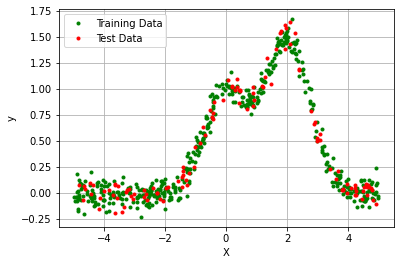

In [7]:
plt.plot(X_train, y_train, ".g", label="Training Data")
plt.plot(X_test, y_test, ".r", label="Test Data")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


### 1.B Set up two Estimators

Bagging, short for bootstrap aggregating, was introduced by Breiman (1996) to reduce the prediction error of learning algorithms with high variance. To reduce the prediction error, we draw bootstrap copies from the original training dataset and train a regression or classification algorithm (base learner) on each copy.

There fist we need a base learner. We are dealing with regression problem, so there exist a number of Regressors, like SGD that we learnt in this course but also Decision Tree Regressor and K-nearest neighbour regressors. The latter two are high-variance regressors that means with small change in the input quantity, a large change in the output is seen. Bagging Methods are better suitable for high variance regressors.

So, for this problem, we use the base learner as Decision Tree Regressor from Scikit. 

### Decision Tree Regressor

We will be using a **Decision Tree Regressor** to fit the *training set* of the datapoints. To show the comparison, we do a similar regression but this time with Bagging for *n=10* (default) iterations. Once, both the models are trained, we predict the output values for each point in *test dataset* and compare the values of the true and predicted outputs in terms of Mean Squared Error.

> "Decision Trees are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.
For instance, in the example below, decision trees learn from data to approximate a sine curve with a set of if-then-else decision rules. The deeper the tree, the more complex the decision rules and the fitter the model."

source [Decision Tree Definition at Sklearn](https://scikit-learn.org/stable/modules/tree.html#tree)

### Additional reading

[Bagging on Low Variance Models](https://towardsdatascience.com/bagging-on-low-variance-models-38d3c70259db)

In [8]:
# Change this for exploring the bias-variance decomposition of other
# estimators. This should work well for estimators with high variance (e.g.,
# decision trees or KNN), but poorly for estimators with low variance (e.g.,
# linear models).

dt_reg = DecisionTreeRegressor(max_depth=3)

estimators = [("Decision Tree", dt_reg ),
              ("Bagging(Decision Tree)", BaggingRegressor(dt_reg))]

n_estimators = len(estimators)

Now we want to train each of the model **n_repeat** number of times. For each iteration, a different set of training and testing set is chosen from the whole dataset. The process goes as follows:

1. Choose one of the estimator that need to trained.

2. Set up empty arrays for y_prediction and y_error.

3. For each iteration ranging in **n_repeat**, split the dataset using **test_train_split** function and train the model on training dataset.

4. After the model is trained, use the test split to predict the value of output.

5. Compute the MSE error between the predicted output and the actual output of the test split.

6. Plot the results and print the mean error for all estimators.

Decision Tree  shows a Mean Error of : 0.1404
Bagging(Decision Tree)  shows a Mean Error of : 0.0980


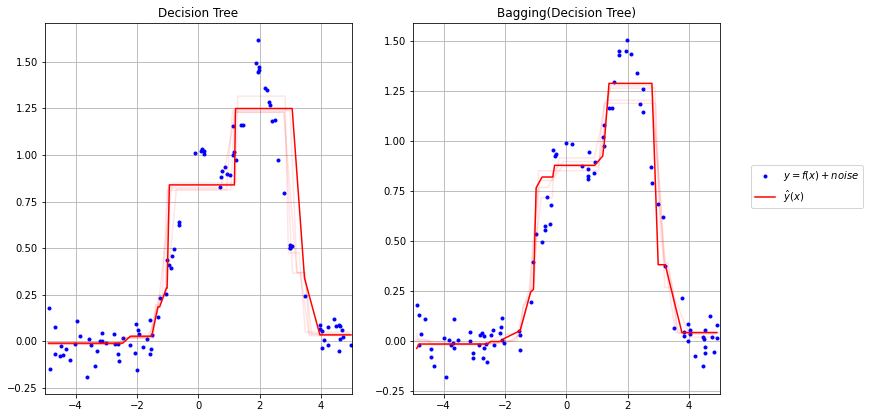

In [9]:

plt.figure(figsize=(15, 15))

# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):
    
    # Predictions array
    y_predict = np.zeros((n_test, n_repeat))
    
    # Error Array
    y_error = np.zeros(n_test)
    
    plt.subplot(2, n_estimators, n + 1)
    
    for i in range(n_repeat):
        # Fit on randomly selected training data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=n_test/(n_train+n_test))
        estimator.fit(X_train, y_train)
        
        # Predict
        X_test, y_test = zip(*sorted(zip(X_test, y_test)))
        y_predict[:, i] = estimator.predict(X_test)
    
        # Compute Error, MSE
        y_error += (y_test - y_predict[:, i]) ** 2
        
        # Plot training and predicted data
        if i == 0:
            plt.plot(X_test, y_test, ".b", label="$y = f(x)+noise$")
            plt.plot(X_test, y_predict[:, i], "r", label=r"$\^y(x)$")
            
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.1)
   
    print("{0}  shows a Mean Error of : {1:.4f}".format(name, np.mean(y_error)))
    
    # Plotting tools
    plt.title(name)
    plt.xlim([-5, 5])
    plt.grid()
    if n == n_estimators - 1:
        plt.legend(loc=(1.1, .5))

plt.subplots_adjust(right=.75)
plt.show()

### As observed, the mean prediction error in the Bagging Estimator is reduced.

# What can you do to further contribute in this notebook ?
